<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202401/blob/main/Modulo07/Modulo07_PCA_Text_as_Data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Ejemplos Principal Component Analysis

## Test Scores

In [1]:
require("pacman")
p_load("tidyverse")

Loading required package: pacman



In [2]:
dta<-read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/estudiantes.csv")
dta

Estudiante,Matematica,Fisica,Literatura,Historia,Deportes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rosa,7.0,6.5,9.2,8.6,8.0
Juan Camilo,7.5,9.4,7.3,7.0,7.0
Daniel,7.6,9.2,8.0,8.0,7.5
Martina,5.0,6.5,6.5,7.0,9.0
Manuel,6.0,6.0,7.8,8.9,7.3
Mercedes,7.8,9.6,7.7,8.0,6.5
Pedro,6.3,6.4,8.2,9.0,7.2
Paola,7.9,9.7,7.5,8.0,6.0
Miguel,6.0,6.0,6.5,5.5,8.7


In [3]:
rownames(dta)<-dta$Estudiante
dta<-dta[,-1]
dta

,Matematica,Fisica,Literatura,Historia,Deportes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rosa,7.0,6.5,9.2,8.6,8.0
Juan Camilo,7.5,9.4,7.3,7.0,7.0
Daniel,7.6,9.2,8.0,8.0,7.5
Martina,5.0,6.5,6.5,7.0,9.0
Manuel,6.0,6.0,7.8,8.9,7.3
Mercedes,7.8,9.6,7.7,8.0,6.5
Pedro,6.3,6.4,8.2,9.0,7.2
Paola,7.9,9.7,7.5,8.0,6.0
Miguel,6.0,6.0,6.5,5.5,8.7


In [78]:
res_pca <- prcomp(dta, scale=TRUE)
res_pca

Standard deviations (1, .., p=5):
[1] 1.70095552 1.27618589 0.58872409 0.35016062 0.09429419

Rotation (n x k) = (5 x 5):
                  PC1         PC2         PC3         PC4        PC5
Matematica -0.5266440 -0.27049630  0.43820071 -0.26121779 -0.6238776
Fisica     -0.4249362 -0.50807221  0.04049491  0.67362724  0.3253895
Literatura -0.3591470  0.56208159  0.56227583 -0.07008647  0.4837473
Historia   -0.3526975  0.58648985 -0.39418032  0.44664495 -0.4204335
Deportes    0.5373018  0.09374599  0.57862603  0.52305619 -0.3067941

In [79]:
p_load("factoextra")
eig_val <- get_eigenvalue(res_pca)
eig_val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,2.893249673,57.8649935,57.86499
Dim.2,1.628650425,32.5730085,90.43800
Dim.3,0.346596049,6.9319210,97.36992
Dim.4,0.122612460,2.4522492,99.82217
Dim.5,0.008891393,0.1778279,100.00000


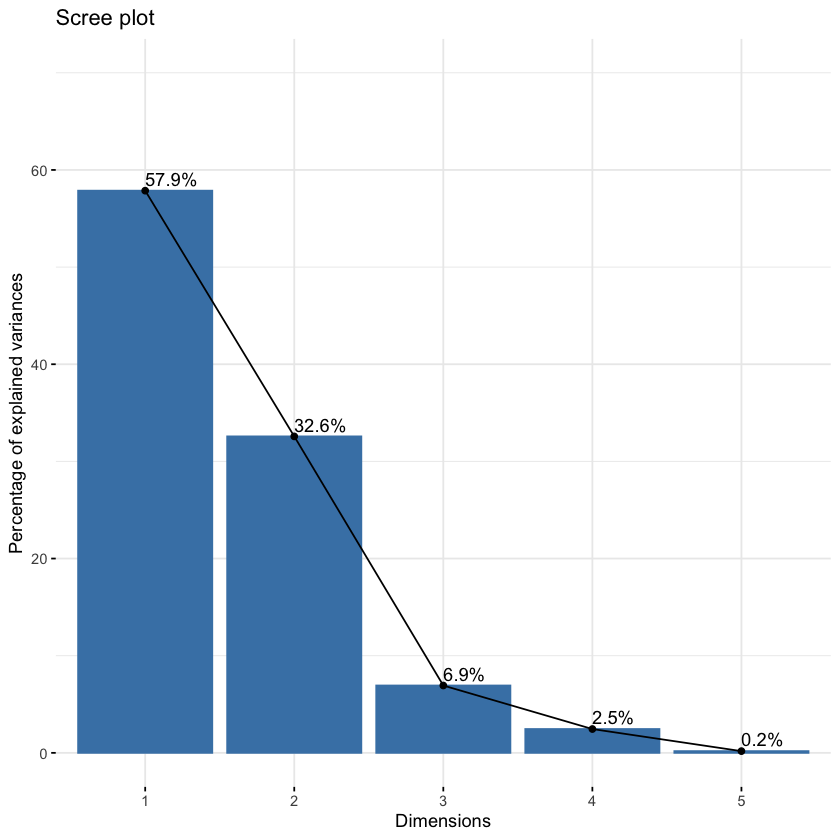

In [80]:
fviz_eig(res_pca, addlabels = TRUE, ylim = c(0, 70))

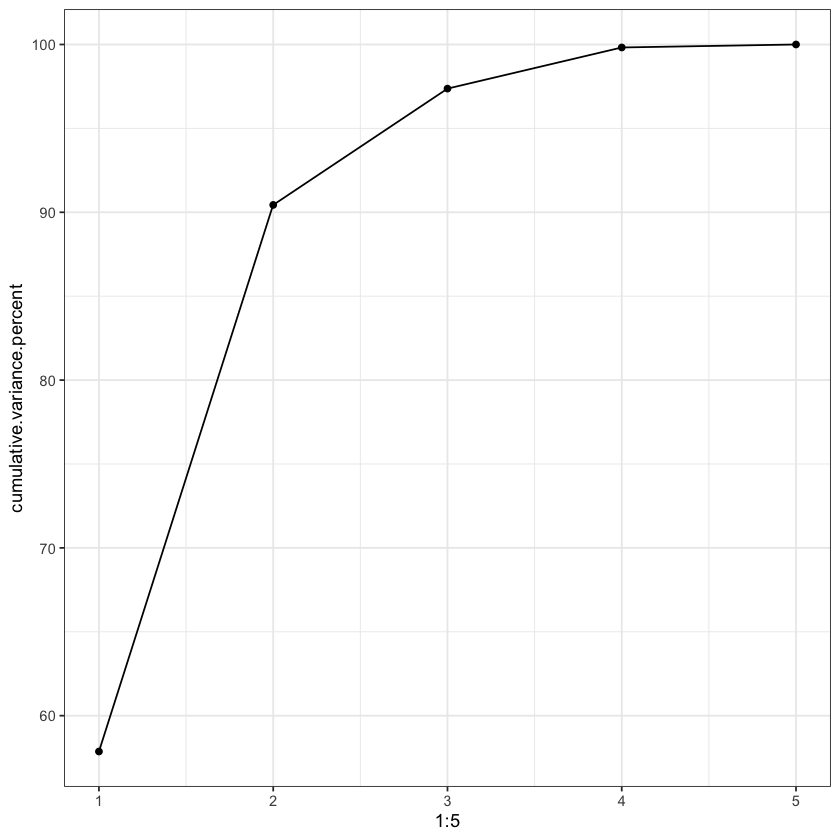

In [81]:
ggplot(eig_val,aes(x=1:5,y=cumulative.variance.percent)) +
    geom_point()+
    geom_line() +
    theme_bw()

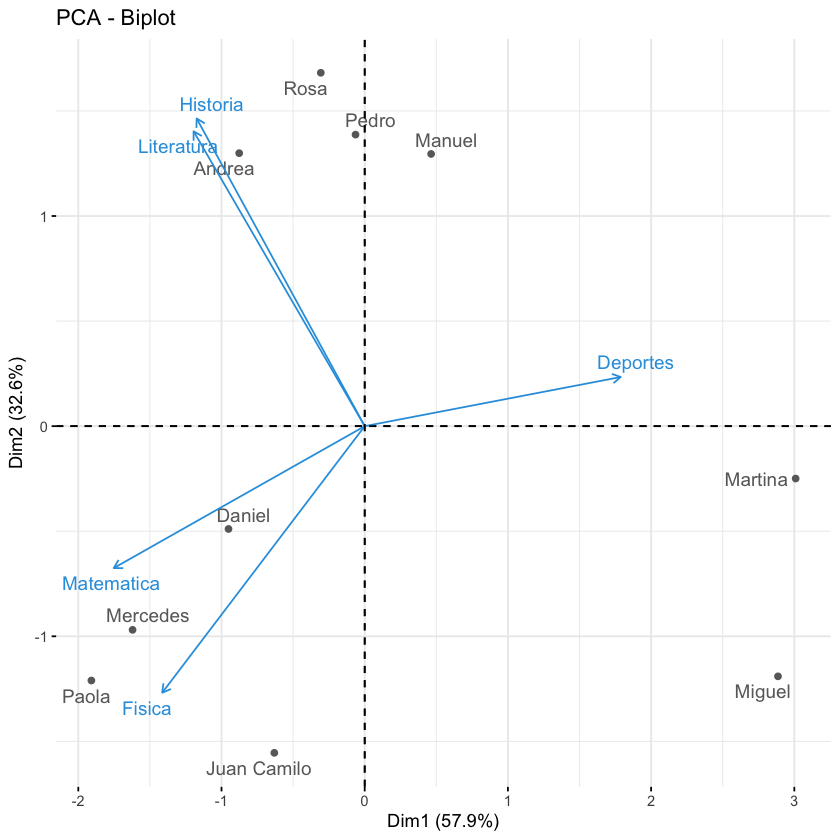

In [82]:
fviz_pca_biplot(res_pca, 
                repel = TRUE,# Avoid text overlapping
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

In [83]:
?fviz_pca_biplot

##  Votos en el congreso de Estados Unidos

Este es un ejemplo un poco mas complejo de como votan los miembros del Congreso de Estados IUnidos. 

Tenemso información de los votos del 111vo Congreso que cubre los años 2009 y 2010, que son los dos primeros años de la presidencia de Obama.

Hay 445 miembros que votan en la casa de representantes (US House of Representatives) y se registraron 1647 votos con -1 por el negativo, +1 por positivo, y 0 por la abstencion o la ausencia

In [10]:
votes <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/rollcall-votes.csv")
head(votes)

,Vote.1,Vote.2,Vote.3,Vote.4,Vote.5,Vote.6,Vote.7,Vote.8,Vote.9,Vote.10,⋯,Vote.1638,Vote.1639,Vote.1640,Vote.1641,Vote.1642,Vote.1643,Vote.1644,Vote.1645,Vote.1646,Vote.1647
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BONNER (R AL-1),-1,1,-1,0,0,1,-1,-1,1,1,⋯,-1,0,-1,-1,-1,-1,0,1,1,0
BRIGHT (D AL-2),1,-1,1,1,1,1,-1,-1,1,1,⋯,1,1,0,0,0,0,0,0,0,0
ROGERS (R AL-3),-1,1,-1,-1,-1,1,-1,-1,1,1,⋯,-1,-1,-1,-1,-1,1,-1,-1,1,1
ADERHOLT (R AL-4),-1,1,-1,-1,1,1,-1,-1,1,1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,1,1
GRIFFITH (D/R AL-5),1,-1,1,1,1,-1,-1,-1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
BACHUS (R AL-6),-1,1,-1,1,1,1,-1,0,1,1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,1,-1


In [11]:
dim(votes)

[1]  445 1647

In [12]:
legis <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/rollcall-members.csv")
head(legis)

,member,state,party
,<chr>,<chr>,<chr>
1,BONNER (R AL-1),AL,R
2,BRIGHT (D AL-2),AL,D
3,ROGERS (R AL-3),AL,R
4,ADERHOLT (R AL-4),AL,R
5,GRIFFITH (D/R AL-5),AL,DR
6,BACHUS (R AL-6),AL,R


En este contexto podriamos pensar para una estructura factorial subjacente de baja dimensión. Aunque cada uno de los votos se refiere a temas diferentes, los representantes suelen están alineados según ejes partidistas e ideológicos (por ejemplo, republicano versus demócrata o liberal versus conservador). Si creemos que todos los votos son partidistas, entonces el voto por el miembro i en el tema j podría predecirse como

$$
x_{i} = h f_i
$$

donde f es el posicionamiento ideologico latente y h como este posicionamiento afecta los votos. Este tipo de situaciones es ideal para PCA

In [13]:
#Estimamos PCA
pcavote <- prcomp(votes, scale=TRUE)

pcavote$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC436,PC437,PC438,PC439,PC440,PC441,PC442,PC443,PC444,PC445
Vote.1,0.0392185821,-0.0052814541,-0.0008821592,-0.0117965967,0.0002234136,2.999469e-02,-1.090707e-03,-0.0026042631,-0.009523944,0.006486599,⋯,-0.0212793756,-0.0107902248,-0.0301143828,-0.020240273,-0.0069774850,-0.008754050,-0.0041422823,0.024651573,-0.043466380,0.914865391
Vote.2,-0.0391977117,0.0032592190,0.0008552094,0.0119564321,-0.0014956698,-2.882768e-02,7.597981e-04,0.0011994905,0.010585114,-0.009037791,⋯,0.0069393063,-0.0042546377,0.0132455132,0.019822224,-0.0115884166,-0.010676636,-0.0215602171,0.056161912,0.016055304,-0.023022852
Vote.3,0.0381410874,-0.0044353607,-0.0001600903,-0.0106797268,0.0034774543,3.353233e-02,1.066685e-05,-0.0069603353,-0.012714053,0.010662978,⋯,-0.0356690409,0.0002374927,0.0261320869,-0.007325811,0.0214683750,0.035740010,0.0036534767,-0.072064709,-0.036380009,0.052993002
Vote.4,0.0203992707,0.0082194904,-0.0280883389,0.0389080492,0.0183515726,-4.768084e-03,-2.677192e-03,0.0704461703,-0.001643367,-0.032532043,⋯,-0.0108651511,0.0343440430,-0.0521666257,-0.016195281,0.0077677227,0.001940784,0.0217344758,-0.025171122,0.015689614,-0.113911670
Vote.5,0.0147399686,0.0169888169,-0.0316774462,0.0515466564,-0.0340640434,1.020201e-03,2.167432e-02,0.0545236565,-0.020209752,-0.039871415,⋯,-0.0249034577,0.0095515528,0.0183592390,0.004744497,-0.0226384179,0.005184316,-0.0141080610,-0.021946415,0.020099933,0.032133061
Vote.6,-0.0383793547,0.0045961508,-0.0002815467,0.0166070856,0.0040331077,-8.138595e-03,-3.470207e-03,0.0077584251,0.003922493,-0.004970230,⋯,-0.0241409880,-0.0076464209,0.0032134638,-0.013894853,-0.0060208176,-0.024922080,-0.0412765022,0.029405692,-0.005844300,-0.161119107
Vote.7,0.0377997580,-0.0045300307,-0.0027346688,-0.0001670661,0.0096342291,1.590377e-02,-1.299722e-03,0.0056927282,0.009770811,0.006116563,⋯,-0.0098752146,-0.0155259383,-0.0149488764,-0.009285142,-0.0188701537,0.004363155,-0.0018068685,0.083311723,-0.045786254,-0.063679554
Vote.8,0.0380978333,-0.0058386593,-0.0008119522,-0.0104878232,0.0030469251,1.636814e-02,5.155197e-03,-0.0068556508,-0.009313019,0.001804481,⋯,-0.0028414330,-0.0070280371,0.0140515722,0.023684427,0.0041090795,-0.004897517,-0.0093436615,0.048934548,-0.031210393,-0.031959037
Vote.9,-0.0045462197,0.0222313274,-0.0250906383,0.0039177561,-0.0192115406,7.794234e-02,3.990486e-02,-0.0057765206,-0.008100532,-0.003125013,⋯,0.0504129746,-0.0142633078,0.0042573822,0.025273132,-0.0340559394,0.013050845,0.0022509701,-0.034213448,0.030537844,0.009245986
Vote.10,0.0020402433,0.0336133082,-0.0296609660,-0.0213705319,0.0267938017,7.128690e-03,5.273481e-02,0.0226609217,-0.023839753,-0.027991486,⋯,0.0236167142,0.0008553311,-0.0180307324,-0.011297842,-0.0091911928,0.022595819,0.0240169982,-0.064747505,0.010313724,0.027161826


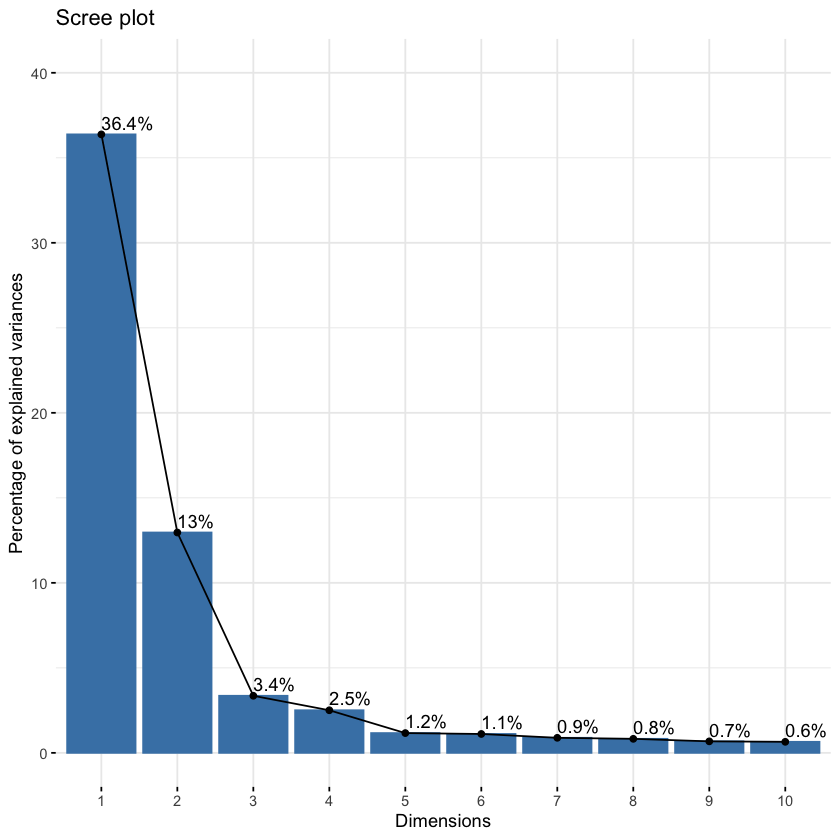

In [14]:
fviz_eig(pcavote, addlabels = TRUE, ylim = c(0, 40))

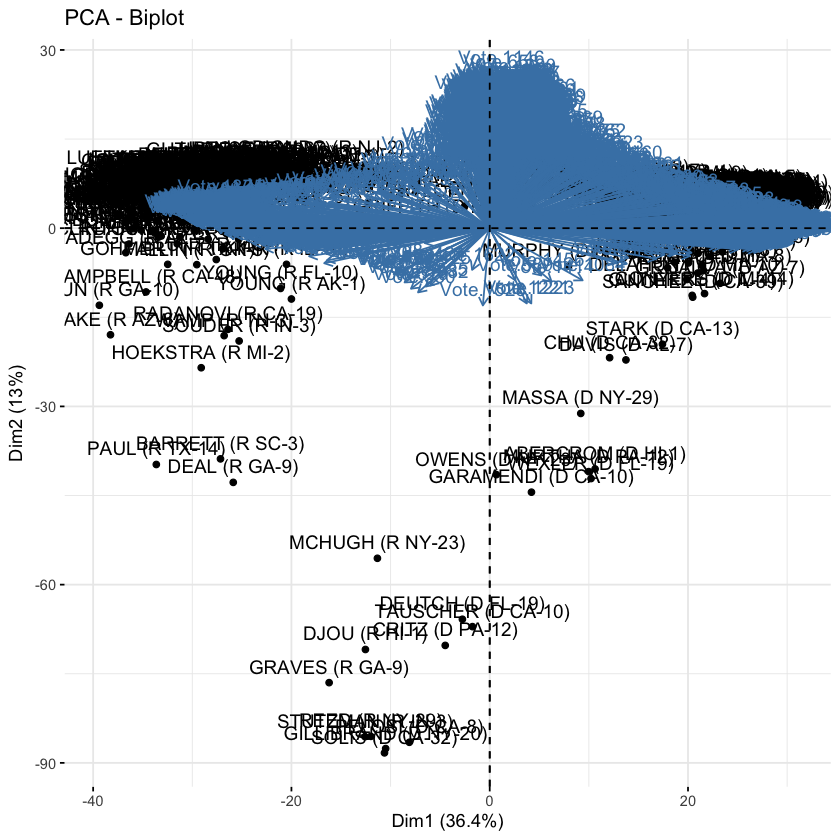

In [15]:
fviz_pca_biplot(pcavote)

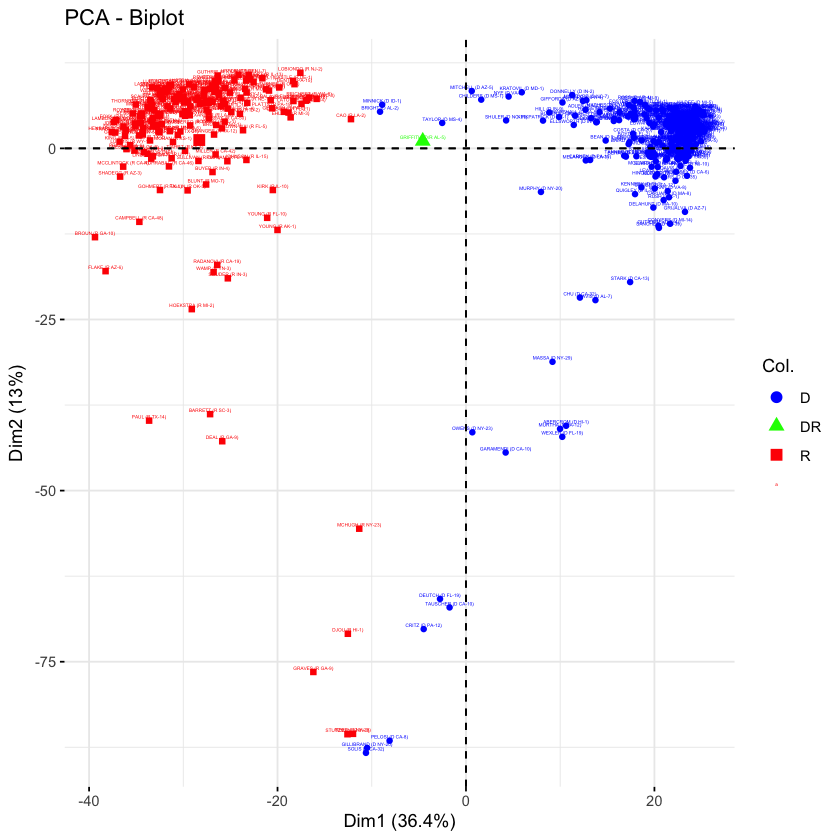

In [18]:
fviz_pca_biplot(pcavote, 
                col.ind = legis$party,
                palette = c("blue", "green", "red"),
                invisible ="var",
                repel=FALSE,
                labelsize = 1
                )

In [19]:
votepc <- predict(pcavote) #
votepc[order(votepc[,1])[1:5],1]

BROUN (R GA-10)     FLAKE (R AZ-6) HENSARLIN (R TX-5)   LAMBORN (R CO-5) 
         -39.37394          -38.25067          -37.58706          -37.37032 
   FRANKS (R AZ-2) 
         -37.22842

In [20]:
votepc[order(-votepc[,1])[1:5],1]

EDWARDS (D MD-4)    PRICE (D NC-4)   MATSUI (D CA-5) SCHAKOWS (D IL-9) 
         25.29151          25.15912          25.12481          24.98754 
  HIRONO (D HI-2) 
         24.98547

In [21]:
votepc[order(votepc[,2])[1:5],2]

SOLIS (D CA-32) GILLIBRAND (D NY-20)      PELOSI (D CA-8) 
           -88.31351            -87.58872            -86.53586 
   STUTZMAN (R IN-3)       REED (R NY-29) 
           -85.59217            -85.53636

In [22]:
votepc[order(-votepc[,2])[1:5],2]

LOBIONDO (R NJ-2)    UPTON (R MI-6)    LANCE (R NJ-7)  GUTHRIE (R KY-2) 
         11.04252          10.74400          10.74006          10.64870 
BIGGERT (R IL-13) 
         10.23859

In [23]:
loadings <- pcavote$rotation[,1:2]

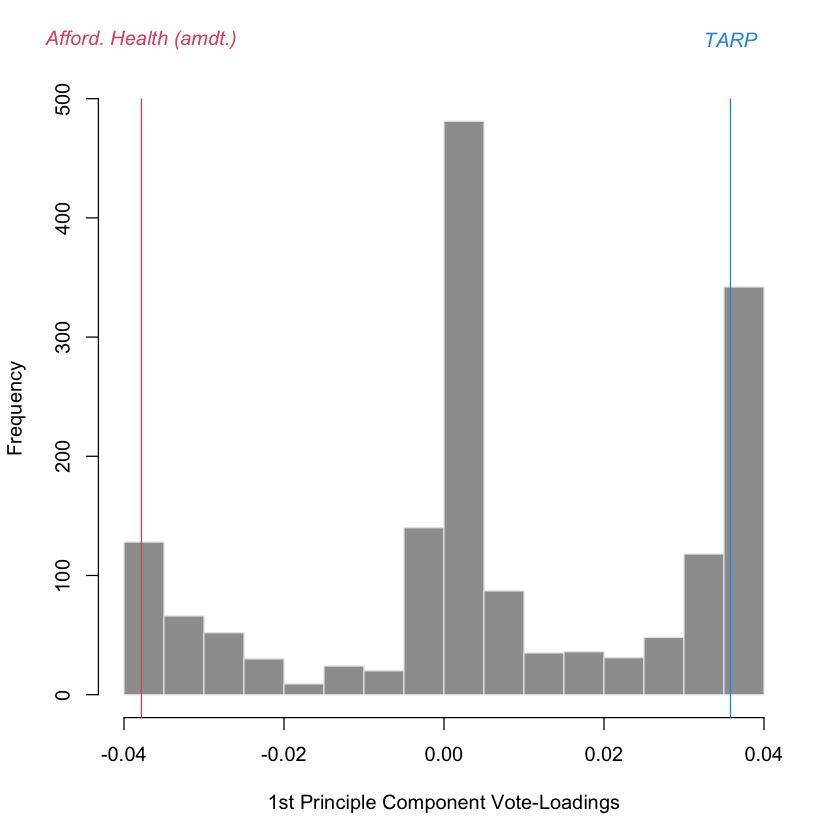

In [24]:
hist(loadings[,1], main="", xlab="1st Principle Component Vote-Loadings",
     col=8, border=grey(.9))
abline(v=loadings[884,1], col=2)
text(x=loadings[884,1], y=550, "Afford. Health (amdt.)", xpd=TRUE, col=2, font=3)
abline(v=loadings[25,1], col=4)
text(x=loadings[25,1], y=550, "TARP", xpd=TRUE, col=4, font=3)

In [25]:
loadings[order(abs(loadings[,2]), decreasing=TRUE)[1:5],2]

Vote.1146   Vote.658  Vote.1090  Vote.1104  Vote.1149 
0.05605862 0.05461947 0.05300806 0.05168382 0.05155729

In [26]:
sort(rowSums(votes==0), decreasing=TRUE)[1:5]

SOLIS (D CA-32) GILLIBRAND (D NY-20)       REED (R NY-29) 
                1628                 1619                 1562 
   STUTZMAN (R IN-3)      PELOSI (D CA-8) 
                1557                 1541

# Principal Component Regression

Para ilustrar vamos a usar datos de television que incluyen respuestas a encuestas para grupos focales sobre programas piloto de televisión (primeros episodios de una nueva serie), así como los resultados del primer año de calificaciones (cuántas personas terminaron viendo el programa). La esperanza es que podamos crear una regla para predecir el interés de los espectadores a partir de encuestas piloto, ayudando así a los estudios a tomar mejores decisiones de programación. 



In [27]:
shows <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/nbc_showdetails.csv", row.names=1)
shows$Genre <- factor(shows$Genre)
head(shows)

,Network,PE,GRP,Genre,Duration
,<chr>,<dbl>,<dbl>,<fct>,<int>
Living with Ed,HGTV,54.0000,151.0,Reality,30
Monarch Cove,LIFE,64.6479,375.5,Drama/Adventure,60
Top Chef,BRAVO,78.5980,808.5,Reality,60
Iron Chef America,FOOD,62.5703,17.3,Reality,30
Trading Spaces: All Stars,TLC,56.0000,44.1,Reality,60
Lisa Williams: Life Among the Dead,LIFE,56.2056,382.6,Reality,60


Tenemos un par de variables de resultado interesantes . Las medidas clásicas de la comerciabilidad de la radiodifusión son las calificaciones. Específicamente, los puntos de rating bruto (GRP) proporcionan un recuento estimado de la audiencia total. En estos datos también realizamos un seguimiento del compromiso proyectado (PE) como una medida más sutil de la atención de la audiencia. Después de ver un programa, se contacta a los espectadores y se les pregunta sobre el orden y los detalles de los eventos del programa. Esto mide su compromiso con el programa (y, quizás lo más importante, con los anuncios mostrados). La PE se informa en una escala de 0 a 100, donde 100 significa que estaban completamente comprometidos y 0 significa que no prestaron atención en absoluto.



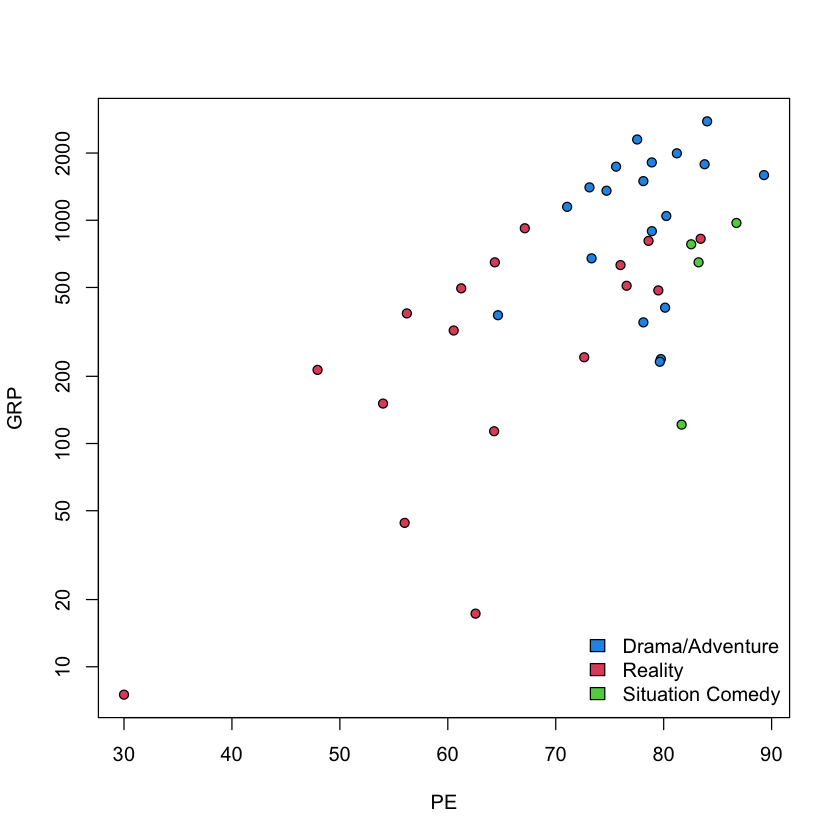

In [28]:
plot(GRP ~ PE, data=shows, bg=c(4,2,3)[shows$Genre], pch=21, log="y")
legend("bottomright", legend=levels(shows$Genre), fill=c(4,2,3), bty="n")

Los datos de la encuesta incluyen 6241 vistas y 20 preguntas para 40 programas. Hay dos tipos de preguntas en la encuesta. Ambos  preguntan hasta qué punto estás de acuerdo con una afirmación. Para el primer trimestre, esta afirmación toma la forma de "Este programa me hace sentir...". Para el segundo trimestre, la afirmación es "Encuentro que este programa me hace sentir...". 



In [29]:
survey <- read.csv("https://github.com/ignaciomsarmiento/datasets/raw/main/nbc_pilotsurvey.csv", as.is=TRUE) 
survey$Show <- factor(survey$Show, levels=rownames(shows))
head(survey)

,Viewer,Show,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,⋯,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,71,Iron Chef America,3,4,4,3,5,4,3,2,⋯,2,2,4,3,1,3,5,2,2,4
2,71,Trading Spaces: All Stars,4,4,3,4,5,2,3,3,⋯,3,1,3,4,2,4,4,2,3,4
3,71,House Hunters,4,4,4,5,5,3,3,2,⋯,4,2,3,5,4,5,2,1,4,4
4,71,What Not to Wear,4,3,3,3,4,2,2,4,⋯,3,2,5,4,4,3,3,2,3,4
5,71,America's Next Top Model,4,4,3,4,4,4,3,3,⋯,2,1,3,4,2,3,3,2,3,3
6,73,Next,2,4,2,4,2,3,3,3,⋯,4,1,4,5,3,2,1,3,5,2


In [30]:
Xpilot <- aggregate(survey[,-(1:2)],  ## -(1:2) to remove the variables 'show' and 'viewer' completely
                by=list(Show=survey$Show), mean)


rownames(Xpilot) <- Xpilot[,1]
Xpilot <- Xpilot[,-1]
head(Xpilot)

,Q1_Attentive,Q1_Excited,Q1_Happy,Q1_Engaged,Q1_Curious,Q1_Motivated,Q1_Comforted,Q1_Annoyed,Q1_Indifferent,Q2_Relatable,Q2_Funny,Q2_Confusing,Q2_Predictable,Q2_Entertaining,Q2_Fantasy,Q2_Original,Q2_Believable,Q2_Boring,Q2_Dramatic,Q2_Suspenseful
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Living with Ed,3.890244,3.780488,3.926829,3.865854,3.804878,3.609756,3.573171,2.609756,3.121951,3.719512,3.926829,2.560976,3.402439,4.134146,3.353659,3.914634,3.878049,2.621951,3.512195,3.500000
Monarch Cove,4.046154,3.861538,3.830769,3.876923,4.000000,3.938462,3.907692,2.969231,3.153846,3.984615,3.784615,2.769231,3.461538,4.107692,3.338462,4.153846,3.876923,2.553846,4.015385,3.707692
Top Chef,3.845745,3.595745,3.632979,3.771277,3.856383,3.196809,3.000000,2.191489,2.398936,3.218085,3.569149,1.840426,2.851064,4.297872,2.489362,3.845745,3.547872,1.829787,3.606383,3.180851
Iron Chef America,3.910053,3.693122,3.613757,3.851852,3.936508,3.333333,3.047619,2.116402,2.439153,3.132275,3.539683,1.947090,2.878307,4.227513,2.513228,3.777778,3.687831,1.915344,3.560847,3.269841
Trading Spaces: All Stars,3.807487,3.540107,3.513369,3.780749,3.909091,3.294118,2.802139,2.101604,2.427807,3.229947,3.481283,1.871658,2.754011,4.149733,2.304813,3.839572,3.780749,1.855615,3.310160,3.016043
Lisa Williams: Life Among the Dead,3.716216,3.648649,3.554054,3.662162,3.756757,3.567568,3.378378,2.202703,2.581081,3.472973,3.378378,2.216216,2.770270,4.000000,3.013514,3.878378,3.797297,1.905405,3.756757,3.527027


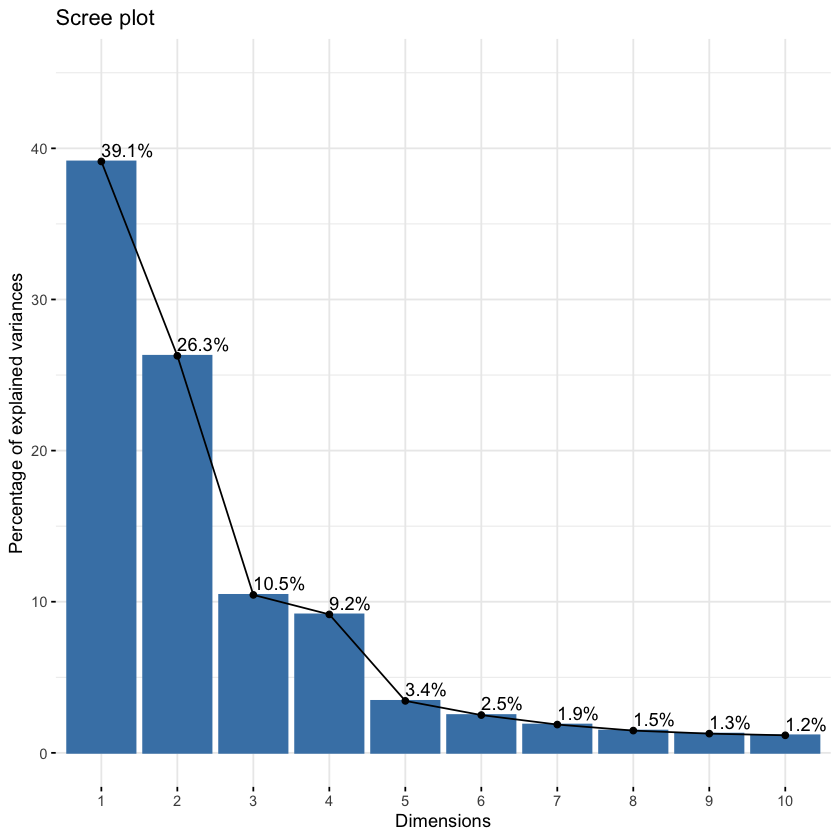

In [31]:
PCApilot <- prcomp(Xpilot, scale=TRUE)

fviz_eig(PCApilot, addlabels = TRUE, ylim = c(0, 45))

In [32]:
round(PCApilot$rotation[,1:3],1)

,PC1,PC2,PC3
Q1_Attentive,-0.3,0.0,0.0
Q1_Excited,-0.3,-0.1,-0.1
Q1_Happy,-0.1,-0.2,-0.5
Q1_Engaged,-0.3,0.0,0.0
Q1_Curious,-0.3,0.0,0.1
Q1_Motivated,-0.2,-0.3,0.0
Q1_Comforted,-0.1,-0.4,-0.1
Q1_Annoyed,0.2,-0.3,0.1
Q1_Indifferent,0.2,-0.4,0.1
Q2_Relatable,-0.1,-0.3,-0.1


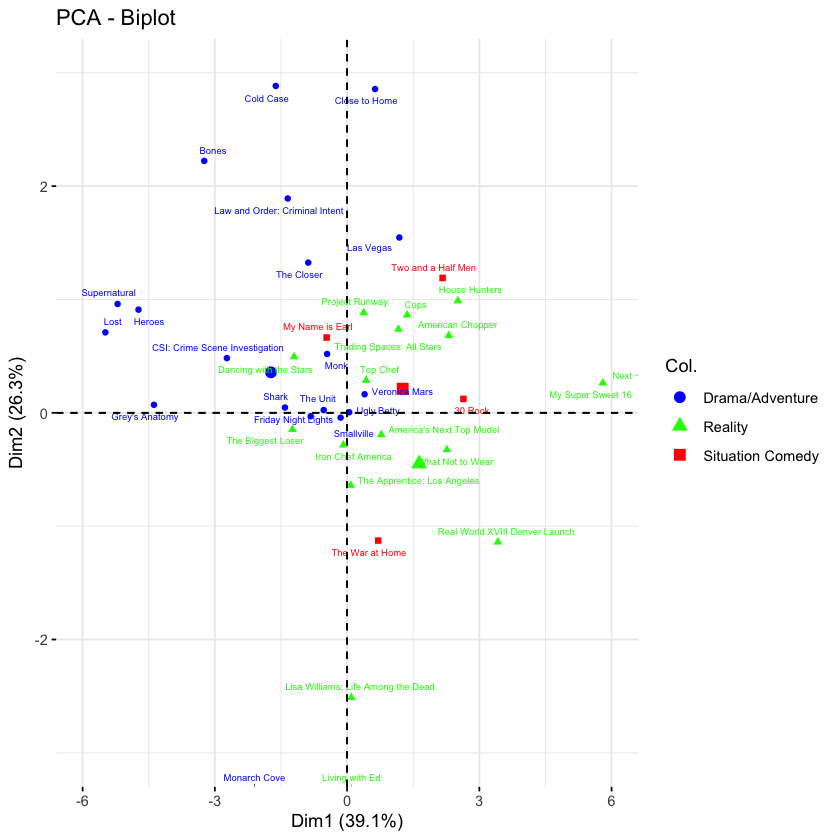

In [33]:
fviz_pca_biplot(PCApilot, 
                col.ind = shows$Genre,
                palette = c("blue", "green", "red"),
                ylim=c(-3,3),
                xlim=c(-6,6), # hides "monarch cove",living with ed", and "next" but these are all tiny 
                invisible ="var",
                repel=TRUE,
                labelsize = 2
                )

In [34]:
p_load("gamlr")


The downloaded binary packages are in
	/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T//RtmpyIwhuZ/downloaded_packages



gamlr installed



In [35]:
zpilot <- predict(PCApilot)

PE <- shows$PE
zdf <- as.data.frame(zpilot)

summary(PEglm <- glm(PE ~ ., data=zdf[,1:2]))


Call:
glm(formula = PE ~ ., data = zdf[, 1:2])

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.6831     1.4370  50.580  < 2e-16 ***
PC1          -2.6401     0.5202  -5.075 1.12e-05 ***
PC2           1.5029     0.6349   2.367   0.0233 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 82.59648)

    Null deviance: 5646.5  on 39  degrees of freedom
Residual deviance: 3056.1  on 37  degrees of freedom
AIC: 294.96

Number of Fisher Scoring iterations: 2


In [36]:
cvlasso <- cv.gamlr(x=as.matrix(Xpilot), y=PE, nfold=10)
coef(cvlasso) 

21 x 1 sparse Matrix of class "dgCMatrix"
                    seg1
intercept       72.68308
Q1_Attentive     .      
Q1_Excited       .      
Q1_Happy         .      
Q1_Engaged       .      
Q1_Curious       .      
Q1_Motivated     .      
Q1_Comforted     .      
Q1_Annoyed       .      
Q1_Indifferent   .      
Q2_Relatable     .      
Q2_Funny         .      
Q2_Confusing     .      
Q2_Predictable   .      
Q2_Entertaining  .      
Q2_Fantasy       .      
Q2_Original      .      
Q2_Believable    .      
Q2_Boring        .      
Q2_Dramatic      .      
Q2_Suspenseful   .      

In [37]:
cvlassoPCR <- cv.gamlr(x=zpilot, y=PE, nfold=10) 
coef(cvlassoPCR) 

21 x 1 sparse Matrix of class "dgCMatrix"
               seg27
intercept 72.6830750
PC1       -1.8523728
PC2        0.5415672
PC3       -0.7258227
PC4        .        
PC5        .        
PC6        .        
PC7        3.0237064
PC8        .        
PC9        .        
PC10       .        
PC11       .        
PC12       .        
PC13       .        
PC14       .        
PC15       .        
PC16      -9.6093041
PC17       .        
PC18       .        
PC19       .        
PC20       .        

In [38]:
cvlassoboth <- cv.gamlr(x=as.matrix(cbind(Xpilot,zpilot)), y=PE, nfold=10)
coef(cvlassoboth)

41 x 1 sparse Matrix of class "dgCMatrix"
                      seg30
intercept       -37.9427669
Q1_Attentive      .        
Q1_Excited        .        
Q1_Happy          .        
Q1_Engaged       14.4309116
Q1_Curious        .        
Q1_Motivated      .        
Q1_Comforted      .        
Q1_Annoyed       -6.6992722
Q1_Indifferent   -2.0620790
Q2_Relatable      .        
Q2_Funny          .        
Q2_Confusing      .        
Q2_Predictable   -0.9151158
Q2_Entertaining  18.3682750
Q2_Fantasy        .        
Q2_Original       .        
Q2_Believable     .        
Q2_Boring         .        
Q2_Dramatic       .        
Q2_Suspenseful    .        
PC1               .        
PC2               .        
PC3               .        
PC4               .        
PC5               .        
PC6               .        
PC7               3.0908059
PC8               .        
PC9               .        
PC10              .        
PC11              .        
PC12              .        
PC13  

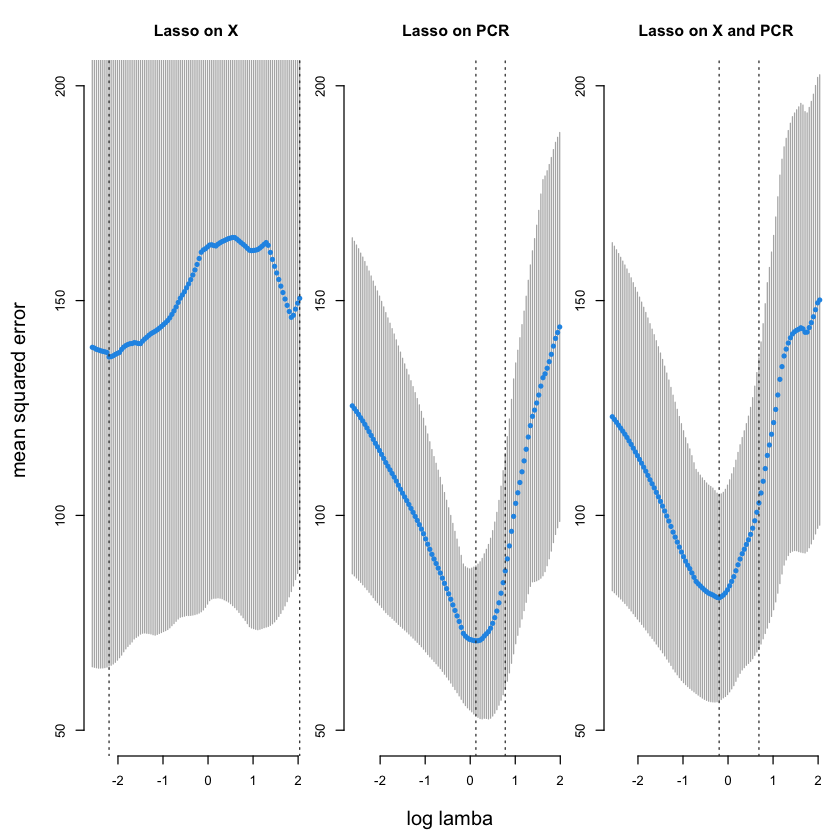

In [39]:
par(mfrow=c(1,3), mai=c(.2,.2,.5,.1), omi=c(.5,.5,0,0))
plot(cvlasso, main="Lasso on X", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoPCR, main="Lasso on PCR", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
plot(cvlassoboth, main="Lasso on X and PCR", ylim=c(50,200), ylab="", xlab="", df=FALSE, bty="n")
mtext(side=2, "mean squared error", outer=TRUE, line=2)
mtext(side=1, "log lamba", outer=TRUE, line=2)

# Texto como Datos: Ejemplos

## Regresión con Texto: Gentzkow and Shapiro

<div >
<img src = "figures/gentzgow_shapiro.png" />
</div>

In [49]:
require("pacman")
p_load("tidyverse","textir","wordcloud")


The downloaded binary packages are in
	/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T//RtmpyIwhuZ/downloaded_packages



wordcloud installed



In [41]:
data("congress109", package = "textir")

In [44]:
congress109Counts[c("Barack Obama","John Boehner"),995:999]

2 x 5 sparse Matrix of class "dgCMatrix"
             stem.cel natural.ga hurricane.katrina trade.agreement
Barack Obama        .          1                20               7
John Boehner        .          .                14               .
             appropriation.bil
Barack Obama                12
John Boehner                 .

In [43]:
congress109Ideology[c("Barack Obama","John Boehner"),1:5]

,name,party,state,chamber,repshare
,<chr>,<fct>,<fct>,<fct>,<dbl>
Barack Obama,Barack Obama,D,IL,S,0.4479136
John Boehner,John Boehner,R,OH,H,0.6456248


### Regresión 

$$
RepShare= X\beta  + u
$$

In [45]:
dim(congress109Counts)

[1]  529 1000

In [46]:
X <- as(congress109Counts, "dMatrix")
repshare <- congress109Ideology$repshare

In [47]:
X

  [[ suppressing 33 column names ‘gifted.talented.student’, ‘national.heritage.corridor’, ‘national.homeownership.month’ ... ]]



529 x 1000 sparse Matrix of class "dgCMatrix"
                                                                               
Chris Cannon              .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Michael Conaway           .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Spencer Bachus            .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Mac Thornberry            .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Randy Neugebauer          .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Nathan Deal               .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Tom Osborne               .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
John Linder               .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Rob Bishop                .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Lynn Westmoreland         .  . .  . .  . . . .  . . . . . . . . . . . .  . .  .
Robert Bennett            .  . .  . .  . . . .  . . . . . . . 2 . . . .  .

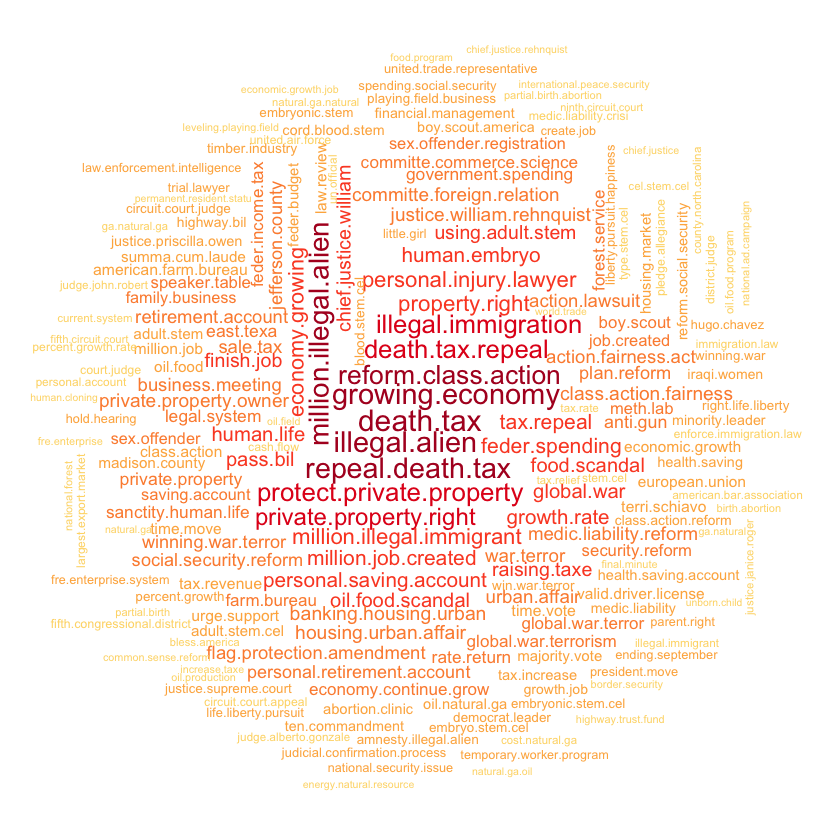

In [50]:

X1 <- as.matrix(congress109Counts)
words<-colnames(X1)

covariance<-apply(X1,2,function(x) cor(x,repshare))

                  

wordcloud(words = words,
          freq = covariance,
          min.freq = 0,
          scale = c(1.5, 0.1), 
          max.words=200, 
          random.order=FALSE, 
          colors=brewer.pal(8, "YlOrRd"))


In [51]:
# lasso
lassoslant <- cv.gamlr(X>0, repshare)  

B <- coef(lassoslant$gamlr)[-1,] 

'as(<lgCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "dMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [52]:
tail(sort(round(B[B!=0],4)),10)

illegal.alien        percent.growth   illegal.immigration 
               0.0079                0.0083                0.0087 
           global.war          look.forward            war.terror 
               0.0098                0.0099                0.0114 
     private.property        action.lawsuit          human.embryo 
               0.0133                0.0142                0.0226 
million.illegal.alien 
               0.0328

In [53]:
head(sort(round(B[B!=0],4)),10)

congressional.black.caucu                 family.value 
                     -0.0839                      -0.0443 
       issue.facing.american           voter.registration 
                     -0.0324                      -0.0298 
     minority.owned.business            strong.opposition 
                     -0.0284                      -0.0264 
                 civil.right        universal.health.care 
                     -0.0259                      -0.0254 
congressional.hispanic.caucu          ohio.electoral.vote 
                     -0.0187                      -0.0183

## Modelado de temas subyacentes


In [54]:
data("we8there", package = "textir")

Waffle House #1258 in Bossier City, Louisiana:

*I normally would not revue a Waffle House but this one deserves it. The workers, Amanda, Amy, Cherry, James and J.D. were the most pleasant crew I have seen. While it was only lunch, B.L.T. and chili, it was great. The best thing was the 50’s rock and roll music, not to loud not to soft. This is a rare exception to what you all think a Waffle House is. Keep up the good work.*

*Overall: 5, Atmosphere: 5, Food: 5, Service: 5, Value: 5.*



Sartin’s Seafood in Nassau Bay, Texas,

*Had a very rude waitress and the manager wasn’t nice either.*
*Overall: 1, Atmosphere: 1, Food: 1, Service: 1, Value: 5.*

In [55]:
x <- we8thereCounts
x[1,x[1,]!=0]

even though larg portion  mouth water     red sauc    babi back     back rib 
           1            1            1            1            1            1 
chocol mouss veri satisfi 
           1            1

### PCA

In [56]:
pca <- prcomp(x, scale=TRUE) # cuidado demora mucho

In [57]:
tail(sort(pca$rotation[,1]))

food great     staff veri     excel food high recommend     great food 
   0.007386860    0.007593374    0.007629771    0.007821171    0.008503594 
    food excel 
   0.008736181

In [61]:
tail(sort(pca$rotation[,4]))

order got after minut  never came   ask check readi order drink order 
 0.05918712  0.05958572  0.06099509  0.06184512  0.06776281  0.07980788

In [62]:
v <- predict(pca)[,1:4]

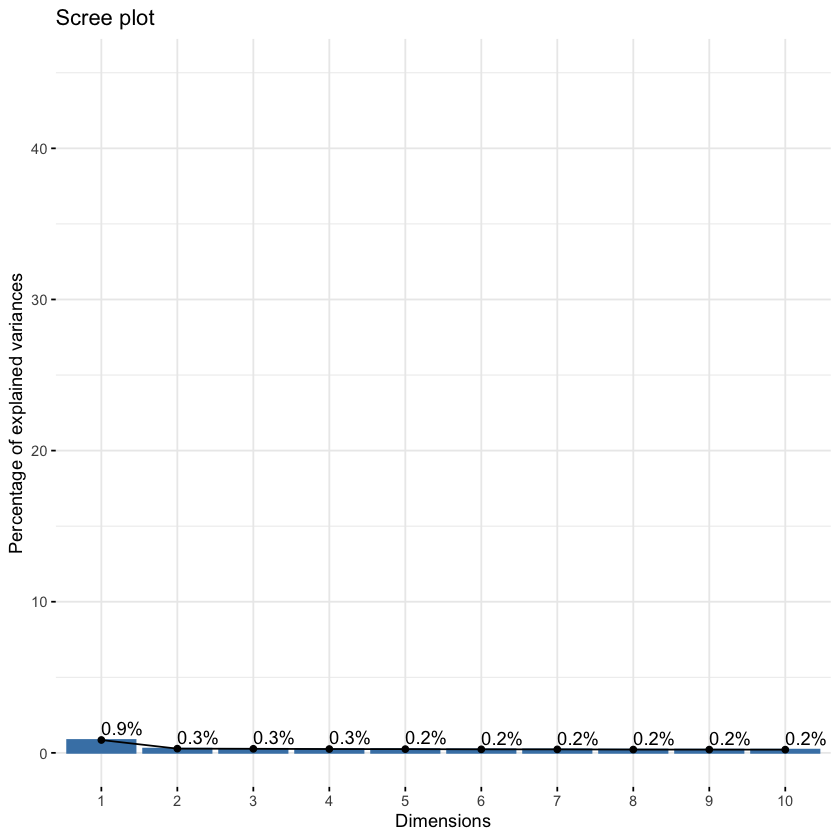

In [77]:
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 45))

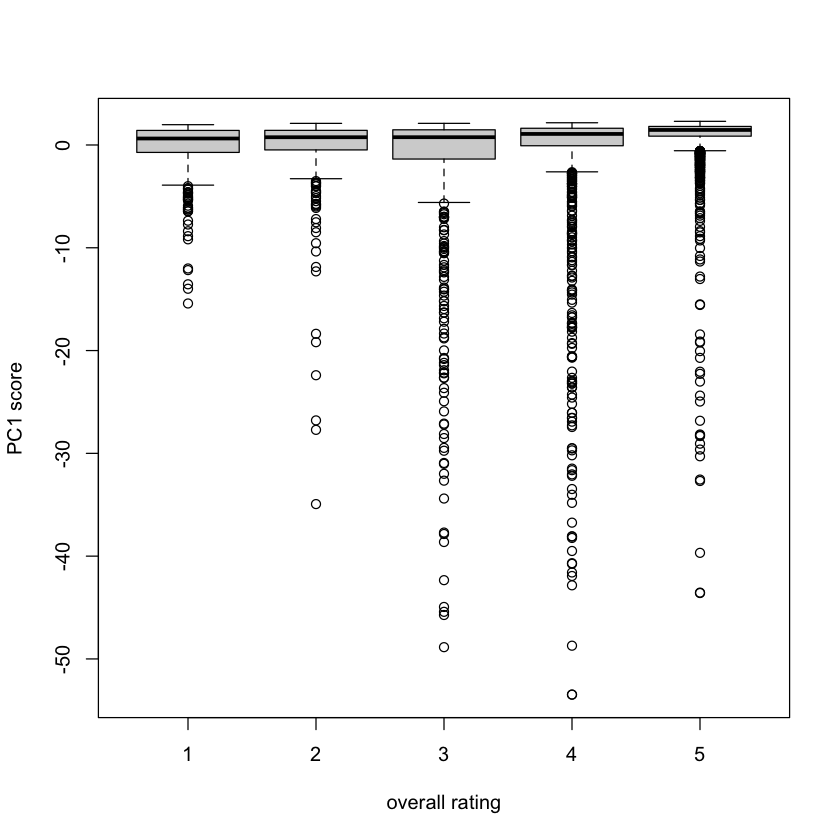

In [63]:
boxplot(v[,1] ~ we8thereRatings$Overall, xlab="overall rating", ylab="PC1 score")

### LDA

In [64]:
p_load("maptpx") # para modelar topicos

x <- as.simple_triplet_matrix(we8thereCounts)


The downloaded binary packages are in
	/var/folders/lp/bhbhb__n1_z91_rjfqljxcdc0000gn/T//RtmpyIwhuZ/downloaded_packages



maptpx installed



In [65]:
tpc <- topics(x,K=10) 


Estimating on a 6166 document collection.
Fitting the 10 topic model.
log posterior increase: 4441.8, 461.4, 101.5, 57.4, 51, 19.2, 26.2, 15.3, 15.4, 11.7, 6.7, 12.2, 8, 10.1, 4.8, 5.3, 3.2, 6.6, 2.8, 7, 3.6, 3.9, 6.7, 5.5, 8.6, 5, 11, 10.3, 12, 7.9, 12.1, 9, 8.8, 13.9, 8.6, 7.3, 6.1, 4.9, 4.3, 12, 11.1, 8.7, 3.2, 2.8, 5.1, 1.9, 2.6, 2.4, 4.9, 2.9, 1.5, 2.5, 4.7, 1.7, 0.9, 1.4, 0.7, 2.5, 2.2, 1.7, 1, 1.3, 1.5, 2, 0.8, 1.7, 0.5, 0.2, 0.5, 0.6, 0.9, 3.9, 0.5, 0.6, 0.4, 0.2, 0.8, 0.2, 1.4, 0.3, 0.5, 0.6, done.


In [66]:
tpcs <- topics(x,K=5*(1:5), verb=1)


Estimating on a 6166 document collection.
Fit and Bayes Factor Estimation for K = 5 ... 25
log posterior increase: 2853.9, 327.1, 85.3, 36.7, 25.9, 19.9, 13.8, 11.6, 9.6, 11.4, 20.3, 7.1, 3.9, 8.3, 4, 5.9, 2.4, 3.8, 4.8, 5.3, 3.8, 4.5, 4, 3.8, 2.1, 2, 4.8, 4.5, 2.5, 4.3, 7, 4.9, 9.3, 2.9, 9.9, 3.8, 6.2, 7.3, 3.8, 6, 7.9, 7.4, 7.2, 4, 5.6, 8, 14.3, 11.5, 17.6, 14.8, 14.1, 14.4, 9.5, 7.1, 5.4, 5.8, 2.4, 2.5, 1.5, 1.1, 1.9, 2.9, 2.8, 3.1, 1, 0.8, 0.4, 1.9, 1.3, 0.8, 0.8, 1.1, 1, 2.2, 1, 0.7, 0.4, 0.4, 0.4, 2, 0.4, 0.7, 0.2, 0.3, 2.2, 0.4, 0.3, 0.1, 0.2, done.
log BF( 5 ) = 79521.94
log posterior increase: 4626.7, 197.4, 53, 24.9, 19, 9.3, 7.4, 4.6, 5.2, 3.4, 2.3, 1.7, 0.8, 0.6, 0.9, 0.5, 0.8, 2.6, 2.7, 1, 0.5, 0.3, 1.1, 0.5, 0.6, 0.7, 1.3, 0.2, done.
log BF( 10 ) = 87157.28
log posterior increase: 3445, 170.2, 49.8, 23.6, 14.1, 31.4, 16.2, 4.8, 6.6, 5.5, 1.9, 5.9, 4, 2.5, 1.8, 2.1, 1.3, 0.7, 3.6, 1.1, 1.3, 0.7, 0.9, 1.1, 1.8, 1.3, 0.8, 1, 0.3, 0.7, 0.4, 1.2, 0.7, 0.8, 0.1, done.
log BF( 

In [67]:
summary(tpcs, n=10) 


Top 10 phrases by topic-over-null term lift (and usage %):

[1] 'food great', 'great food', 'great servic', 'veri good', 'food veri', 'food excel', 'veri nice', 'excel servic', 'excel food', 'great place' (14.6) 
[2] 'high recommend', 'italian food', 'best italian', 'mexican food', 'list extens', 'wait staff', 'staff friend', 'authent mexican', 'outstand servic', 'food wonder' (11.6) 
[3] 'over minut', 'never go', 'go back', 'flag down', 'anoth minut', 'arriv after', 'after minut', 'wait anoth', 'poor servic', 'ask manag' (10.4) 
[4] 'enough share', 'open daili', 'highlight menu', 'until pm', 'select includ', 'fresh veget', 'pm friday', 'monday through', 'dinner buffet', 'seafood entre' (10.4) 
[5] 'never return', 'one worst', 'don wast', 'wast time', 'here sever', 'sever time', 'servic poor', 'custom servic', 'small portion', 'food bland' (9.4) 
[6] 'good work', 'best kept', 'out world', 'great experi', 'just right', 'kept secret', 'best restaur', 'make reserv', 'real treat', 'prime 

In [68]:
rownames(tpcs$theta)[order(tpcs$theta[,1], decreasing=TRUE)[1:10]]


[1] "veri good"    "great food"   "food great"   "great place"  "veri friend" 
 [6] "veri nice"    "good food"    "great servic" "food excel"   "food servic"

In [69]:
rownames(tpcs$theta)[order(tpcs$theta[,2], decreasing=TRUE)[1:10]]

[1] "dine experi"     "high recommend"  "wait staff"      "wine list"      
 [5] "mexican food"    "italian food"    "italian restaur" "fine dine"      
 [9] "staff friend"    "make feel"

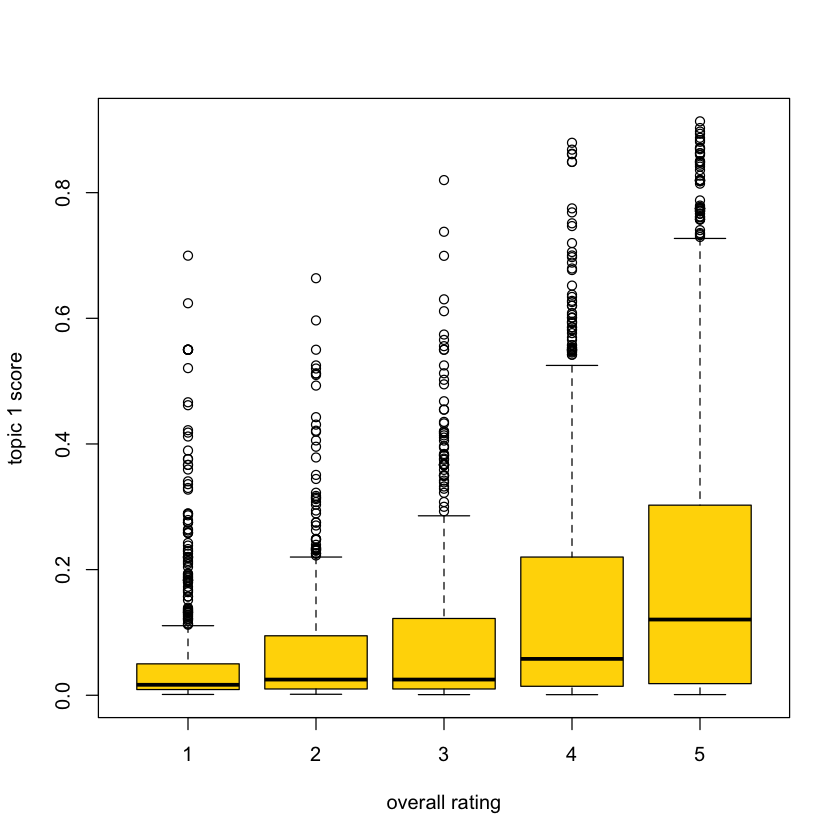

In [70]:
boxplot(tpcs$omega[,1] ~ we8thereRatings$Overall, col="gold", xlab="overall rating", ylab="topic 1 score")


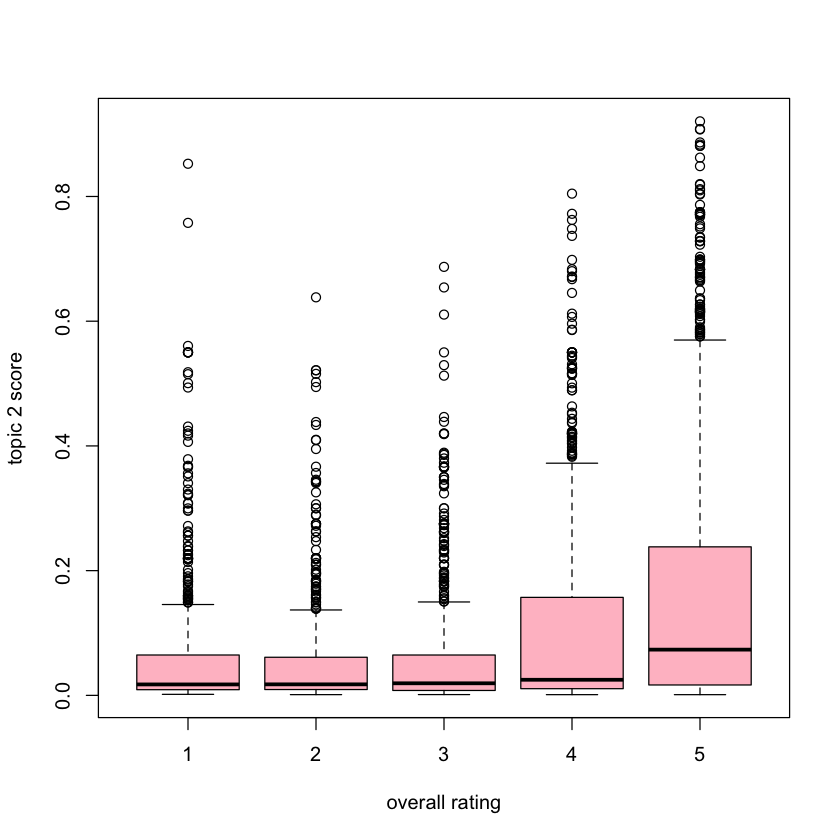

In [71]:
boxplot(tpcs$omega[,2] ~ we8thereRatings$Overall, col="pink", xlab="overall rating", ylab="topic 2 score")

In [72]:
stars <- we8thereRatings[,"Overall"]

In [73]:
Xtopics<-as(tpcs$omega, "dMatrix")

In [74]:
p_load("gamlr")
regtopics.cv <- cv.gamlr(tpcs$omega, stars)

In [75]:
regwords.cv <- cv.gamlr(we8thereCounts, stars)

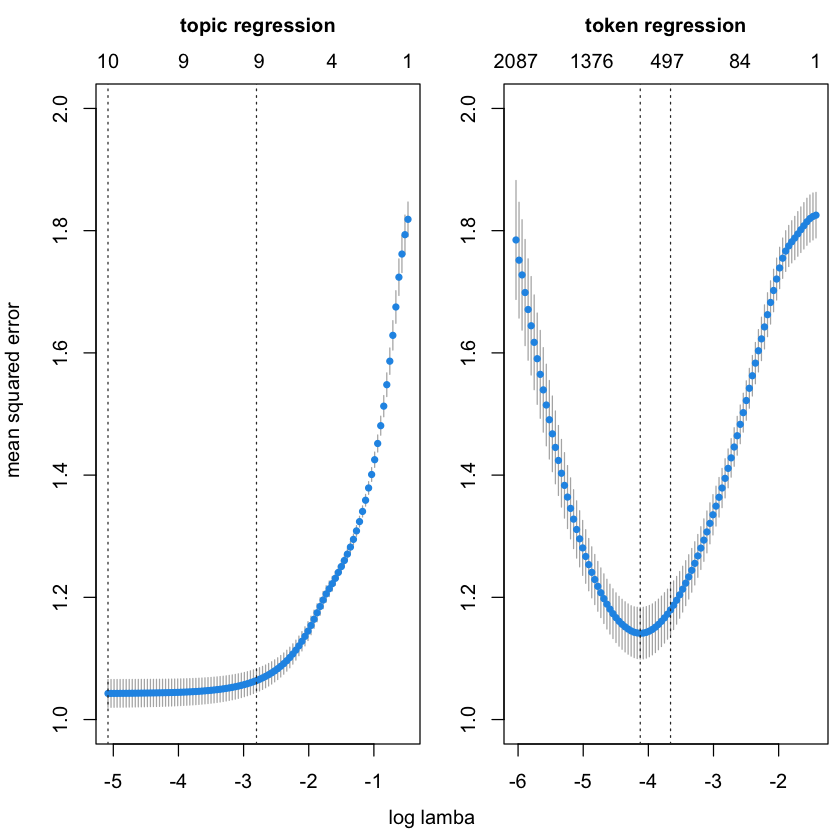

In [76]:
par(mfrow=c(1,2), mai=c(.3,.6,.7,.1), omi=c(.5,.2,0,0))
plot(regtopics.cv, ylim=c(1,2), xlab="", ylab="")
mtext("topic regression", font=2, line=2)
plot(regwords.cv, ylim=c(1,2), xlab="", ylab="")
mtext("token regression", font=2, line=2)
mtext(side=2, "mean squared error", outer=TRUE, line=0)
mtext(side=1, "log lamba", outer=TRUE, line=1)